In [1]:
basedir = '/home/abhinavgupta0110/generalized_nCM'

import os

is_google_colab = False

### Mount the Google drive if needed

In [2]:
if is_google_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    
    %pip install quadpy

os.chdir(os.path.join(basedir, 'generalized_nCMs'))

In [3]:
from src.solvers.neuralDistDDE_train_HOTs import history

import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from statistics import median

from IPython.core.debugger import set_trace

In [4]:
os.chdir(basedir)

In [5]:
class args:
    def __init__(self, model_dir):
        self.model_dir = model_dir

In [6]:
model_dirs = ['BioOA_nODE_testcase/model_dir_case3ea', 
              'BioOA_nODE_testcase/model_dir_case3eb', 
              'BioOA_nODE_testcase/model_dir_case3ec', 
              'BioOA_nODE_testcase/model_dir_case3ed', 
              'BioOA_nODE_testcase/model_dir_case3ee',
              'BioOA_nODE_testcase/model_dir_case3ef',
              'BioOA_nODE_testcase/model_dir_case3eg']

epochs = [0, 25, 50, 75, 100, 125, 150, 175, 200]

In [7]:
def read_data(epochs, model_dirs, who = 'train'):

    data = []

    for j in range(len(epochs)):
        data.append([])
        for i in range(len(model_dirs)):
            loss_history = history(args(model_dirs[i]))
            loss_history.read()
            try:
                idx = loss_history.epoch.index(epochs[j])
                if who == 'train':
                    data[j].append(loss_history.train_loss[idx])
                else:
                    data[j].append(loss_history.val_loss[idx])
            except:
                continue
                
    return data

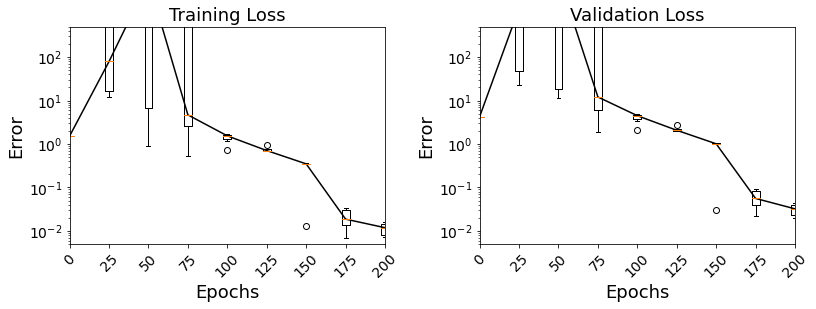

In [12]:
fig = plt.figure(figsize=(13, 4), facecolor='white')
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.cla()
ax.set_title('Training Loss', fontsize=18)
ax.set_xlabel('Epochs', fontsize=18)
ax.set_ylabel('Error', fontsize=18)

data = read_data(epochs, model_dirs)

data_median = [median(data[i]) for i in range(len(data))]
box = ax.boxplot(data, positions = epochs, widths=5)
ax.semilogy(epochs, data_median, '-k')

ax.set_xlim(0, max(epochs))
ax.set_ylim(0.005, 500)

ax.tick_params(axis='x', labelsize=14, labelrotation=45)
ax.tick_params(axis='y', labelsize=14)



ax2.cla()
ax2.set_title('Validation Loss', fontsize=18)
ax2.set_xlabel('Epochs', fontsize=18)
ax2.set_ylabel('Error', fontsize=18)

data = read_data(epochs, model_dirs, 'val')
data_median = [median(data[i]) for i in range(len(data))]
box = ax2.boxplot(data, positions = epochs, widths=5)
ax2.semilogy(epochs, data_median, '-k')

ax2.set_xlim(0, max(epochs))
ax2.set_ylim(0.005, 500)

ax2.tick_params(axis='x', labelsize=14, labelrotation=45)
ax2.tick_params(axis='y', labelsize=14)

plt.subplots_adjust(wspace=0.3)
plt.show()